In [1]:
import model
import pandas as pd

In [2]:
scenario = model.CounterterrorismModel(N=200, height=3,width=4,prob_violence=0.0005,policy='NONE',reactive_lvl='none',discontent='mid')
for i in range(200):
    scenario.step()

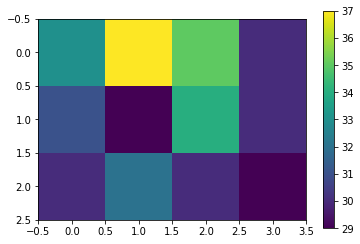

In [4]:
import numpy as np
import matplotlib.pyplot as plt

agent_counts = np.zeros((scenario.grid.width, scenario.grid.height))
for cell in scenario.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count

plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

<AxesSubplot:>

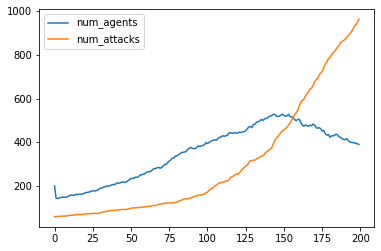

In [5]:
model_df = scenario.datacollector.get_model_vars_dataframe()
model_df.plot()

In [10]:
max_yval = np.array(model_df.max(axis=1))
max_yval

array([200, 144, 142, 145, 146, 149, 148, 148, 149, 153, 156, 158, 157,
       157, 162, 160, 162, 162, 162, 165, 168, 170, 171, 173, 175, 178,
       177, 178, 180, 185, 189, 190, 194, 196, 199, 200, 199, 204, 206,
       206, 209, 214, 212, 214, 218, 217, 217, 218, 224, 229, 234, 234,
       236, 240, 239, 243, 250, 251, 254, 255, 262, 264, 265, 267, 273,
       279, 279, 283, 285, 281, 284, 291, 298, 299, 307, 314, 319, 327,
       328, 337, 337, 343, 347, 352, 354, 355, 357, 367, 371, 376, 372,
       371, 371, 376, 383, 380, 383, 386, 388, 398, 394, 399, 403, 408,
       409, 411, 410, 419, 422, 425, 430, 427, 430, 431, 442, 443, 441,
       442, 444, 441, 443, 446, 444, 448, 448, 453, 461, 470, 472, 467,
       481, 482, 491, 494, 496, 504, 500, 504, 510, 509, 516, 520, 521,
       528, 527, 520, 518, 519, 524, 528, 522, 518, 521, 528, 517, 516,
       515, 526, 535, 546, 564, 583, 591, 597, 611, 622, 629, 642, 648,
       658, 676, 686, 691, 707, 718, 723, 741, 757, 766, 782, 78

In [6]:
model_df

,num_agents,num_attacks
0,200,58
1,144,60
2,142,60
3,145,61
4,146,61
...,...,...
195,398,916
196,398,931
197,394,938
198,393,949


In [6]:
model_df.to_csv('model_df.csv')

In [3]:
agents_df = scenario.datacollector.get_agent_vars_dataframe()
agents_df

status agent_loc
Step AgentID                         
1    1          sympathetic    (2, 2)
     2            combatant    (2, 0)
     3              neutral    (1, 0)
     4          sympathetic    (0, 0)
     5        anti-violence    (2, 3)
...                     ...       ...
200  1263     anti-violence    (2, 2)
     1264       sympathetic    (1, 1)
     1265           neutral    (0, 0)
     1266       sympathetic    (2, 2)
     1267         combatant    (1, 3)

[74533 rows x 2 columns]

In [4]:
agents_df = agents_df.reset_index()
agents_nogov_df = agents_df[agents_df.status.isin(['anti-violence','combatant','neutral','sympathetic'])]

agents_nogov_df.head()

,Step,AgentID,status,agent_loc
0,1,1,sympathetic,"(2, 2)"
1,1,2,combatant,"(2, 0)"
2,1,3,neutral,"(1, 0)"
3,1,4,sympathetic,"(0, 0)"
4,1,5,anti-violence,"(2, 3)"


In [5]:
agents_nogov_df['step_cat'] = agents_nogov_df.Step.astype('str')
agent_stati_gb = agents_nogov_df.groupby(by=['step_cat','status'])
agent_stati = agent_stati_gb['AgentID'].nunique().reset_index()
agent_stati = agent_stati.rename(columns={'AgentID':'num_agents'})
agent_stati['step'] = agent_stati.step_cat.astype('int')
agent_stati

/tmp/ipykernel_8429/3820759982.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agents_nogov_df['step_cat'] = agents_nogov_df.Step.astype('str')


,step_cat,status,num_agents,step
0,1,anti-violence,49,1
1,1,combatant,54,1
2,1,neutral,51,1
3,1,sympathetic,46,1
4,10,anti-violence,70,10
...,...,...,...,...
752,98,sympathetic,58,98
753,99,anti-violence,281,99
754,99,combatant,16,99
755,99,neutral,63,99


In [55]:
agent_stati.status.unique()

array(['anti-violence', 'combatant', 'neutral', 'sympathetic'],
      dtype=object)

In [6]:
mod_step = 3
step_df = agent_stati[agent_stati.step == mod_step]
step_df

,step_cat,status,num_agents,step
481,3,anti-violence,52,3
482,3,combatant,2,3
483,3,neutral,52,3
484,3,sympathetic,44,3


In [8]:
import numpy as np
test_list = np.zeros(4)
test_list

array([0., 0., 0., 0.])

In [9]:
test_list[0] = step_df[step_df.status=='combatant'].num_agents.to_numpy()

In [10]:
test_list

array([2., 0., 0., 0.])

In [13]:
max_sent_gb = agents_nogov_df.groupby(by=['step_cat','agent_loc','status'])
sentiments_cnt = max_sent_gb['AgentID'].nunique().reset_index()
sentiments_cnt = sentiments_cnt.rename(columns={'AgentID':'num_agents'})
sentiments_cnt

,step_cat,agent_loc,status,num_agents
0,1,"(0, 0)",anti-violence,2
1,1,"(0, 0)",combatant,3
2,1,"(0, 0)",neutral,3
3,1,"(0, 0)",sympathetic,3
4,1,"(0, 1)",anti-violence,3
...,...,...,...,...
7610,99,"(2, 2)",neutral,3
7611,99,"(2, 2)",sympathetic,6
7612,99,"(2, 3)",anti-violence,25
7613,99,"(2, 3)",neutral,3


In [14]:
max_sentiments_gb = sentiments_cnt.groupby(by=['step_cat','agent_loc'])
max_sentiments = max_sentiments_gb['num_agents'].max().reset_index()
print('max sent shape',max_sentiments.shape)
max_sentiments = max_sentiments.merge(sentiments_cnt, on=['step_cat','agent_loc','num_agents'])
max_sentiments

max sent shape (2400, 3)


,step_cat,agent_loc,num_agents,status
0,1,"(0, 0)",3,combatant
1,1,"(0, 0)",3,neutral
2,1,"(0, 0)",3,sympathetic
3,1,"(0, 1)",5,neutral
4,1,"(0, 2)",4,anti-violence
...,...,...,...,...
2493,99,"(1, 3)",25,anti-violence
2494,99,"(2, 0)",27,anti-violence
2495,99,"(2, 1)",26,anti-violence
2496,99,"(2, 2)",24,anti-violence


In [18]:
max_sents_nodups = max_sentiments.drop_duplicates(subset=['step_cat','agent_loc','num_agents'])
max_sents_nodups['step'] = max_sents_nodups.step_cat.astype('int')

/tmp/ipykernel_8429/2916747281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_sents_nodups['step'] = max_sents_nodups.step_cat.astype('int')


In [19]:
max_sents_nodups

,step_cat,agent_loc,num_agents,status,step
0,1,"(0, 0)",3,combatant,1
3,1,"(0, 1)",5,neutral,1
4,1,"(0, 2)",4,anti-violence,1
5,1,"(0, 3)",6,anti-violence,1
6,1,"(1, 0)",7,neutral,1
...,...,...,...,...,...
2493,99,"(1, 3)",25,anti-violence,99
2494,99,"(2, 0)",27,anti-violence,99
2495,99,"(2, 1)",26,anti-violence,99
2496,99,"(2, 2)",24,anti-violence,99


In [20]:
mod_step = 3
max_sent_step_df = max_sents_nodups[max_sents_nodups.step == mod_step]
max_sent_step_df

,step_cat,agent_loc,num_agents,status,step
1553,3,"(0, 0)",3,neutral,3
1555,3,"(0, 1)",5,neutral,3
1556,3,"(0, 2)",5,anti-violence,3
1557,3,"(0, 3)",7,anti-violence,3
1558,3,"(1, 0)",7,neutral,3
1559,3,"(1, 1)",7,neutral,3
1560,3,"(1, 2)",7,neutral,3
1561,3,"(1, 3)",4,anti-violence,3
1563,3,"(2, 0)",8,neutral,3
1564,3,"(2, 1)",6,sympathetic,3


In [71]:
max_sents_nodups = max_sentiments.drop_duplicates(subset=['step_cat','agent_loc','num_agents'],keep=False)
max_sents_nodups

,step_cat,agent_loc,num_agents,status
0,1,"(0, 0)",9,combatant
1,1,"(0, 1)",7,anti-violence
2,1,"(0, 2)",7,sympathetic
3,1,"(0, 3)",7,combatant
4,1,"(1, 0)",9,sympathetic
...,...,...,...,...
2487,99,"(1, 3)",24,anti-violence
2488,99,"(2, 0)",22,anti-violence
2489,99,"(2, 1)",26,anti-violence
2490,99,"(2, 2)",31,anti-violence


In [68]:
max_sents_dups = max_sentiments[max_sentiments.duplicated(subset=['step_cat','agent_loc','num_agents'],keep=False)]
max_sents_dups

,step_cat,agent_loc,num_agents,status
6,1,"(1, 2)",4,combatant
7,1,"(1, 2)",4,neutral
8,1,"(1, 2)",4,sympathetic
9,1,"(1, 3)",4,anti-violence
10,1,"(1, 3)",4,sympathetic
...,...,...,...,...
2100,7,"(1, 2)",4,neutral
2228,8,"(0, 2)",6,anti-violence
2229,8,"(0, 2)",6,sympathetic
2361,9,"(0, 2)",6,anti-violence


In [70]:
hierarchy = ['combatant','sympathetic','neutral','anti-violence']
for dup_step in max_sents_dups.step_cat.unique():
    print('dup step',dup_step)
    to_dedup = max_sents_dups[max_sents_dups.step_cat == dup_step]
    print('to dedup stati',to_dedup.status.unique())
    for hier_status in hierarchy:
        print('considering status',hier_status)
        if hier_status in to_dedup.status.unique():
            max_sents_nodups.append(to_dedup[to_dedup.status == hier_status])
            break

dup step 1
to dedup stati ['combatant' 'neutral' 'sympathetic' 'anti-violence']
considering status combatant
dup step 10
to dedup stati ['anti-violence' 'neutral']
considering status combatant
considering status sympathetic
considering status neutral
dup step 11
to dedup stati ['anti-violence' 'neutral']
considering status combatant
considering status sympathetic
considering status neutral
dup step 119
to dedup stati ['anti-violence' 'neutral']
considering status combatant
considering status sympathetic
considering status neutral
dup step 12
to dedup stati ['anti-violence' 'neutral']
considering status combatant
considering status sympathetic
considering status neutral
dup step 13
to dedup stati ['anti-violence' 'neutral']
considering status combatant
considering status sympathetic
considering status neutral
dup step 130
to dedup stati ['anti-violence' 'neutral']
considering status combatant
considering status sympathetic
considering status neutral
dup step 136
to dedup stati ['anti-vi

In [29]:
test_array = np.zeros((scenario.grid.width, scenario.grid.height))
print(test_array)
test_array[(1,2)]

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


0.0

In [30]:
agents_df['step_cat'] = agents_df.Step.astype('str')
agent_stati_gb = agents_df.groupby(by=['step_cat','status'])

In [31]:
agent_stati = agent_stati_gb['AgentID'].nunique().reset_index()
agent_stati = agent_stati.rename(columns={'AgentID':'num_agents'})
agent_stati['step'] = agent_stati.step_cat.astype('int')

palestinian_stati = agent_stati[agent_stati.status.isin(['anti-violence','combatant','neutral','sympathetic'])]
palestinian_stati

,step_cat,status,num_agents,step
1,1,anti-violence,49,1
2,1,combatant,58,1
3,1,neutral,44,1
4,1,sympathetic,49,1
6,10,anti-violence,70,10
...,...,...,...,...
956,98,sympathetic,36,98
958,99,anti-violence,286,99
959,99,combatant,5,99
960,99,neutral,62,99


In [32]:
palestinian_stati.to_csv('palestinian_stati.csv')

<AxesSubplot:xlabel='step', ylabel='num_agents'>

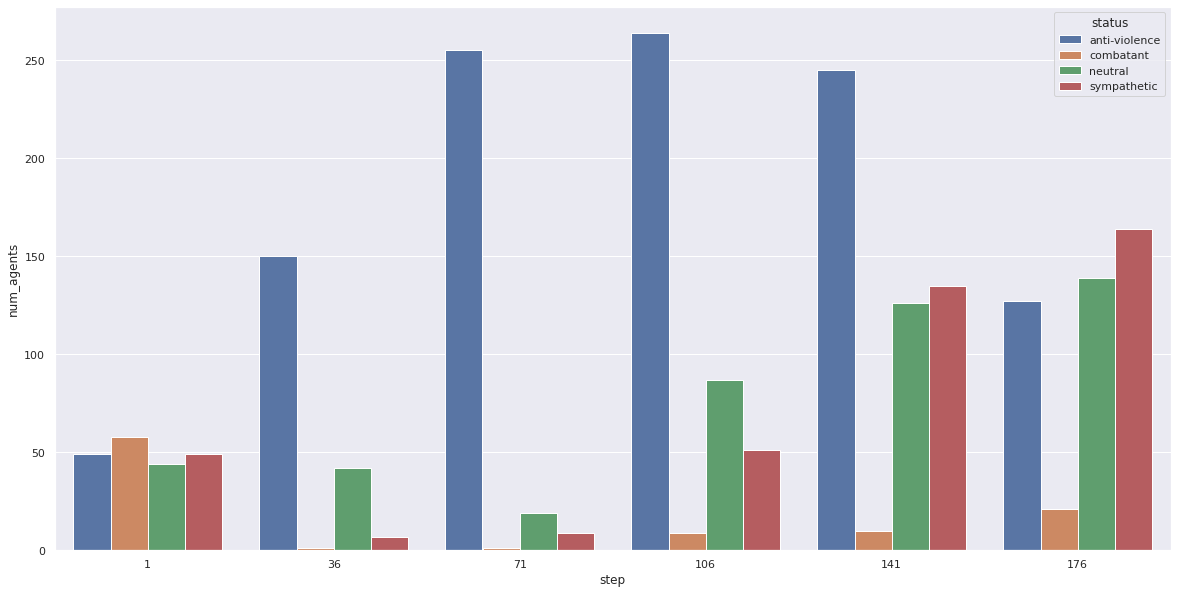

In [33]:
import seaborn as sns
import numpy as np
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))

sns.barplot(x='step',y='num_agents',hue='status',data=palestinian_stati[palestinian_stati.step.isin(range(1,700,round(700*0.05)))])

sympathetic
sympathetic
sympathetic
sympathetic
sympathetic
neutral
anti-violence
sympathetic
neutral
sympathetic
sympathetic
sympathetic


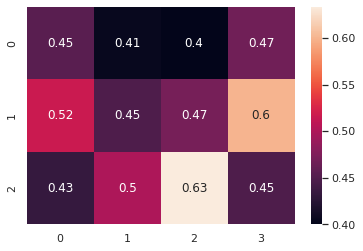

In [34]:
dominant_sentiments = np.zeros((scenario.grid.width, scenario.grid.height))
dominant_sentiments = dominant_sentiments.astype(str)
dominant_sentiments[dominant_sentiments=='0.0'] = 'none'
percent_dominant_sentiments = np.zeros((scenario.grid.width, scenario.grid.height))

for cell in scenario.grid.coord_iter():
    cell_content, x, y = cell
    status_dict = {'anti-violence':0,'NONE':0,'neutral':0,'sympathetic':0,\
        'combatant':0,'TARG-CONC':0,'TARG-REPR':0,'INDISC-CONC':0,'INDISC-REPR':0}
    for agent in cell_content:
        status_dict[agent.status] += 1

    dominant_sentiment =  max(status_dict, key = lambda x: status_dict[x])
    print(dominant_sentiment)
    if len(cell_content) > 0:
        perc_dominant_sentiment = max(status_dict.values())/len(cell_content)
    else:
        perc_dominant_sentiment = 0

    dominant_sentiments[x][y] = dominant_sentiment 
    percent_dominant_sentiments[x][y] = perc_dominant_sentiment  
     
ax = sns.heatmap(percent_dominant_sentiments, annot=True)
plt.show()

In [35]:
dominant_sentiments_df = pd.DataFrame(dominant_sentiments)
dominant_sentiments_df

,0,1,2,3
0,sympathetic,sympathetic,sympathetic,sympathetic
1,sympathetic,neutral,anti-violence,sympathetic
2,neutral,sympathetic,sympathetic,sympathetic


In [36]:
# code from stackoverflow
vals_to_int = {j:i for i, j in enumerate(pd.unique(dominant_sentiments.ravel()))}
vals_to_int

{'sympathetic': 0, 'neutral': 1, 'anti-violence': 2}

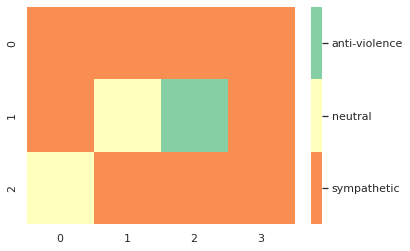

In [37]:
n = len(vals_to_int)
cmap = sns.color_palette('Spectral', n)
ax = sns.heatmap(dominant_sentiments_df.replace(vals_to_int),cmap=cmap)

colorbar = ax.collections[0].colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(vals_to_int.keys()))
plt.show()

In [38]:
govt_status = agent_stati[agent_stati.status.isin(['NONE','INDISC-REPR','INDISC-CONC','TARG-CONC','TARG-REPR'])]
govt_status.drop('num_agents', axis=1,inplace=True)
govt_status = govt_status.sort_values('step',ascending=True)
govt_status

/home/npodpx/venv/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,step_cat,status,step
0,1,NONE,1
547,2,NONE,2
601,3,NONE,3
653,4,NONE,4
702,5,NONE,5
...,...,...,...
527,196,NONE,196
532,197,NONE,197
537,198,INDISC-REPR,198
542,199,NONE,199


In [39]:
govt_status = agent_stati[agent_stati.status.isin(['NONE','INDISC-REPR','INDISC-CONC','TARG-CONC','TARG-REPR'])]
govt_status.drop('num_agents', axis=1,inplace=True)
govt_status = govt_status.sort_values('step',ascending=True)
govt_status

/home/npodpx/venv/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,step_cat,status,step
0,1,NONE,1
547,2,NONE,2
601,3,NONE,3
653,4,NONE,4
702,5,NONE,5
...,...,...,...
527,196,NONE,196
532,197,NONE,197
537,198,INDISC-REPR,198
542,199,NONE,199


In [40]:
govt_status_cum = govt_status.groupby(['status']).cumcount()
govt_status_cum = govt_status_cum.rename('cumulative_actions')
govt_status_cum = govt_status.join(govt_status_cum)
govt_status_cum.head(10)

,step_cat,status,step,cumulative_actions
0,1,NONE,1,0
547,2,NONE,2,1
601,3,NONE,3,2
653,4,NONE,4,3
702,5,NONE,5,4
752,6,NONE,6,5
805,7,NONE,7,6
854,8,NONE,8,7
908,9,NONE,9,8
5,10,TARG-REPR,10,0


<AxesSubplot:xlabel='step', ylabel='cumulative_actions'>

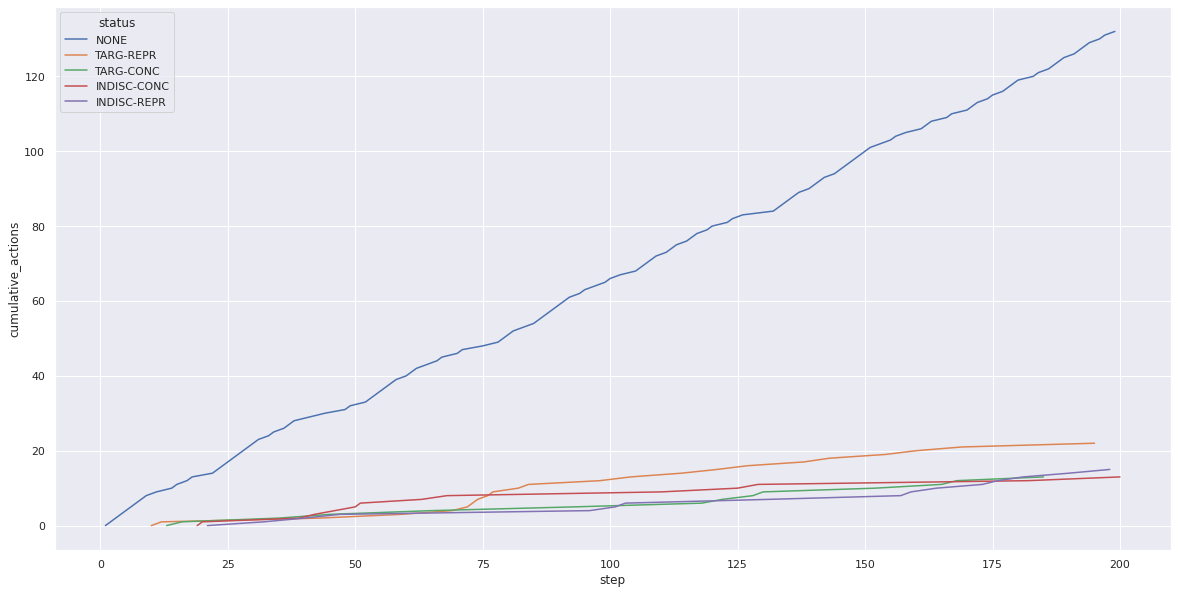

In [41]:
plt.figure(figsize=(20,10))

sns.lineplot(x='step',y='cumulative_actions',hue='status',data=govt_status_cum)

In [42]:
govt_status_cum = pd.get_dummies(govt_status['status']).cumsum()
govt_status_cum

,INDISC-CONC,INDISC-REPR,NONE,TARG-CONC,TARG-REPR
0,0,0,1,0,0
547,0,0,2,0,0
601,0,0,3,0,0
653,0,0,4,0,0
702,0,0,5,0,0
...,...,...,...,...,...
527,13,15,131,14,23
532,13,15,132,14,23
537,13,16,132,14,23
542,13,16,133,14,23


In [43]:
scenario.datacollector.get_table_dataframe('Deaths')

,step,deaths
0,1,58
1,2,2
2,3,0
3,4,1
4,5,0
...,...,...
195,196,12
196,197,15
197,198,7
198,199,11


In [44]:
govt_actions = scenario.datacollector.get_table_dataframe('govt_actions')
govt_actions

,step,govt_action,action_loc,violence_aftermath
0,1,NONE,"(0, 0)",10
1,2,NONE,"(0, 0)",10
2,3,NONE,"(0, 0)",9
3,4,NONE,"(0, 0)",10
4,5,NONE,"(0, 0)",9
...,...,...,...,...
195,196,NONE,"(0, 0)",10
196,197,NONE,"(0, 0)",10
197,198,INDISC-REPR,"(0, 0)",10
198,199,NONE,"(0, 0)",10


In [45]:
govt_actions.to_csv('govt_actions.csv')